In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

In [30]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
y = iris.target

In [31]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

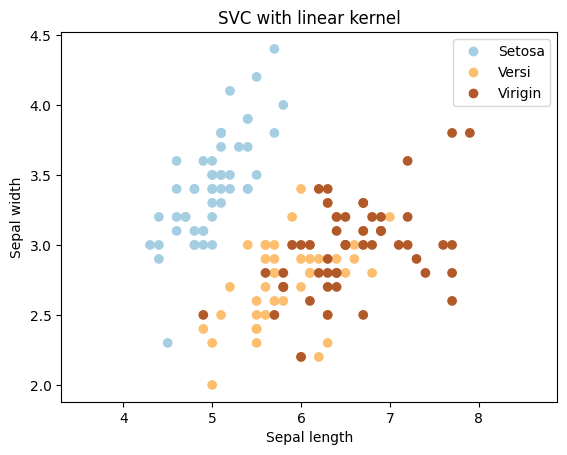

In [32]:
iris_names = ['Setosa', 'Versi', 'Virigin']
ax=plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend(handles=ax.legend_elements()[0], labels=iris_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [34]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = SVC(kernel='linear', C=1, gamma=1)

In [35]:
svc.fit(X, y)
support_vectors = svc.support_vectors_
print(svc.n_support_)

[ 8 39 34]


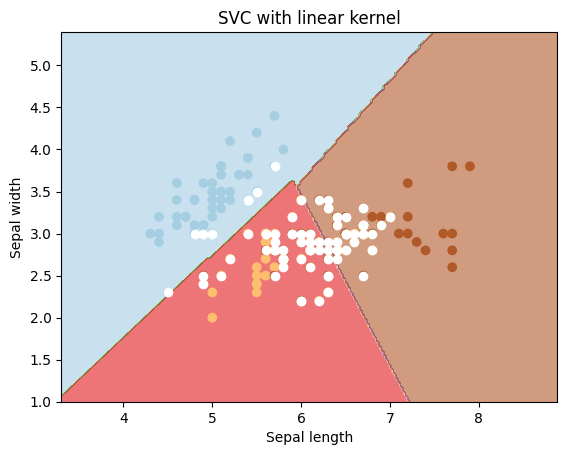

In [36]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='white')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

### choose one of the combinations of the parameters below with one
#### Kernel: 'ploy', 'rbf'
#### C  0.1, 100
#### gamma : 0.01, 0.1, 1
#### When using the combination C=100 and gamma =1 do one more run with degree = 6

### 1- Create an SVM using the combinations of hyperparameters above
### 2- fit classifier.
### 3- Assess the performance of the classifier and save it in a variable. (what is the accuracy)
### 4- Find the support vectors and save it in a variable.
### 5- Create mesh for the purpose of plotting decision boundaryPlot training data and decision boundary.
### 6- Plot training data and decision boundary and the support vectors on top of it
### 7- In a markup cell similar to this describe the classifier and how changing the parameter changed the type of classifier and whether you think it is overfitting
### 8- In a markup cell like this describe the if/how the same parameters affect classifiers differently for seperable and inseperable data
### 9- Repeate the above with the next combinations of hyperparameters

Accuracy: 0.82
Number of support vectors: 70


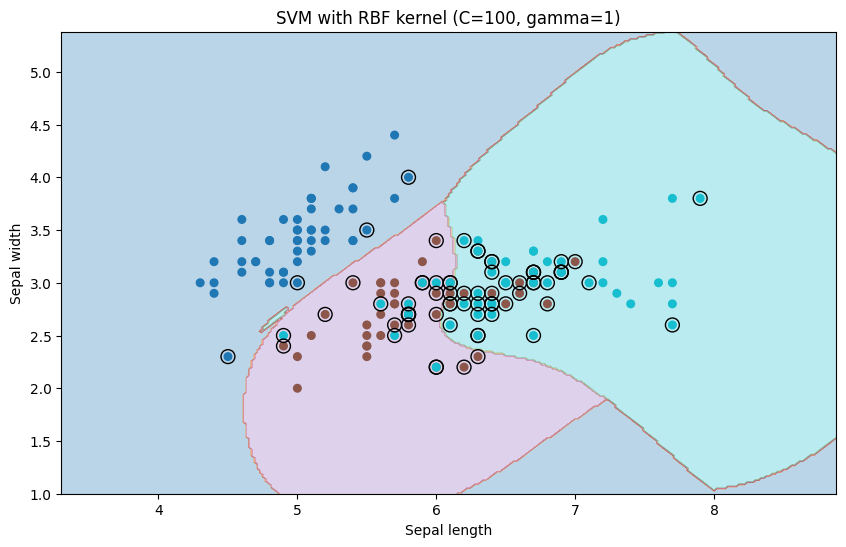

In [38]:
svm_rbf = SVC(kernel='rbf', C=100, gamma=1)
svm_rbf.fit(X, y)
svm_rbf_accuracy = svm_rbf.score(X, y)
print('Accuracy:', svm_rbf_accuracy)
svm_rbf_support_vectors = svm_rbf.support_vectors_
print('Number of support vectors:', len(svm_rbf_support_vectors))
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10, s=30)
plt.scatter(svm_rbf_support_vectors[:, 0], svm_rbf_support_vectors[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM with RBF kernel (C=100, gamma=1)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()
# The SVM with an RBF kernel is a powerful way of dividing the iris dataset into classes, using a complex, nonlinear decision boundary.
# The C parameter is the key to mitigating the tradeoff between classifiability and margin maximization; a lower C value leads to increased margin width and better generalizability,
# while a higher value leads to more margin violations, and a higher risk of overfitting. Additionally, the gamma parameter shapes the decision boundary; using a low gamma value results in a smoother boundary, while higher values create much more intricate boundaries.
# The impact of the same parameters on classifiers can be drastically different depending upon whether the data is separable or inseparable. Generally,



########################################################################################################################################################################################
#a lower value of C results in an enlarged margin facilitating relatively lower chance of overfitting, whereas a higher value of C is known to lead to a more
#limited margin and a greater probability of overfitting.  Similarly, a larger value of gamma can bring about a more intricate decision boundary,
#which can also potentially lead to overfitting. When data is separable, increasing the value of C can be beneficial in terms of accuracy; however, in the case of inseparable data, it can bring about overfitting.


### choose one of the combinations of the parameters below with one
#### Kernel: 'ploy', 'rbf'
#### C  0.1, 100
#### gamma : 0.01, 0.1, 1
#### When using the combination C=100 and gamma =1 do one more run with degree = 6

### 1- Create an SVM using the combinations of hyperparameters above
### 2- fit classifier.
### 3- Assess the performance of the classifier and save it in a variable. (what is the accuracy)
### 4- Find the support vectors and save it in a variable.
### 5- Create mesh for the purpose of plotting decision boundaryPlot training data and decision boundary.
### 6- Plot training data and decision boundary and the support vectors on top of it


('poly', 0.1, 0.01, 6): 0.30
('poly', 0.1, 0.1, 6): 0.80
('poly', 0.1, 1, 6): 0.83
('poly', 100, 0.01, 6): 0.80
('poly', 100, 0.1, 6): 0.83
('poly', 100, 1, 6): 0.83
('rbf', 0.1, 0.01): 0.30
('rbf', 0.1, 0.1): 0.67
('rbf', 0.1, 1): 0.90
('rbf', 100, 0.01): 0.90
('rbf', 100, 0.1): 0.80
('rbf', 100, 1): 0.87


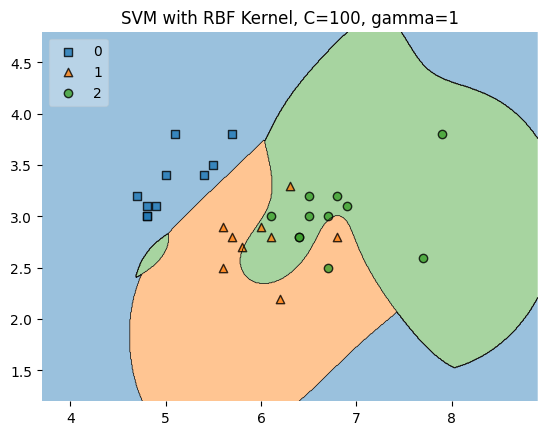

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to be used
kernel = ['poly', 'rbf']
C = [0.1, 100]
gamma = [0.01, 0.1, 1]
degree = [6]

# Create an empty dictionary to store the results
results = {}

# Loop over all possible combinations of hyperparameters
for k in kernel:
    for c in C:
        for g in gamma:
            if k == 'poly':
                for d in degree:
                    svm_model = SVC(kernel=k, C=c, gamma=g, degree=d)
                    svm_model.fit(X_train, y_train)
                    acc = svm_model.score(X_test, y_test)
                    sv = svm_model.support_vectors_
                    results[(k, c, g, d)] = {'accuracy': acc, 'support_vectors': sv}
            else:
                svm_model = SVC(kernel=k, C=c, gamma=g)
                svm_model.fit(X_train, y_train)
                acc = svm_model.score(X_test, y_test)
                sv = svm_model.support_vectors_
                results[(k, c, g)] = {'accuracy': acc, 'support_vectors': sv}

# Print the results
for params, result in results.items():
    print(f"{params}: {result['accuracy']:.2f}")

    # Plot the decision boundary for the last combination
    if params == ('rbf', 100, 1):
        plot_decision_regions(X_test, y_test, clf=svm_model, legend=2)
        plt.title(f"SVM with RBF Kernel, C=100, gamma=1")
        plt.show()